In [1]:
import numpy as np
import pandas as pd
import re

In [ ]:
df = pd.read_csv("/Users/bhavesh/Documents/Semester 6/AIML/Lab/housePredictionModel/kav/Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df['total_sqft'] 

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
print(df['area_type'].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


In [7]:
df.dropna(subset=['location'])

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [8]:
df['size'] = df['size'].str.extract('(\d+)').astype(float)  # Extract numbers from "2 BHK" format
df['size'].fillna(df['size'].median(), inplace=True)

In [9]:
print(df['size'].value_counts())

size
2.0     5528
3.0     4873
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
27.0       1
19.0       1
16.0       1
43.0       1
14.0       1
12.0       1
13.0       1
18.0       1
Name: count, dtype: int64


In [10]:
df.drop(columns=['society'], inplace=True)

In [11]:
df['bath'].fillna(df['bath'].median(), inplace=True)

In [12]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689,4.0,1.0,488.00


In [13]:
df['balcony'].fillna(0, inplace=True)

In [14]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689,4.0,1.0,488.00


In [15]:
print(df.nunique())

area_type          4
availability      81
location        1305
size              19
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64


In [16]:
df['availability'] = df['availability'].apply(lambda x: 1 if x == 'Ready To Move' else 0)

In [17]:
df = pd.get_dummies(df, columns=['area_type'], drop_first=True)

In [18]:
location_counts = df['location'].value_counts().to_dict()
df['location'] = df['location'].map(location_counts)

In [19]:
df['area_type_Carpet  Area'] = df['area_type_Carpet  Area'].apply(lambda x: 1 if x == True else 0)
df['area_type_Plot  Area'] = df['area_type_Plot  Area'].apply(lambda x: 1 if x == True else 0)
df['area_type_Super built-up  Area'] = df['area_type_Super built-up  Area'].apply(lambda x: 1 if x == True else 0)

In [ ]:
df = df[pd.to_numeric(df['total_sqft'], errors='coerce').notna()]
df

,availability,location,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,132.0,2.0,1056,2.0,1.0,39.07,0,0,1
1,1,17.0,4.0,2600,5.0,3.0,120.00,0,1,0
2,1,186.0,3.0,1440,2.0,3.0,62.00,0,0,0
3,1,23.0,3.0,1521,3.0,1.0,95.00,0,0,1
4,1,66.0,2.0,1200,2.0,1.0,51.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13315,1,540.0,5.0,3453,4.0,0.0,231.00,0,0,0
13316,1,7.0,4.0,3600,5.0,0.0,400.00,0,0,1
13317,1,171.0,2.0,1141,2.0,1.0,60.00,0,0,0
13318,0,28.0,4.0,4689,4.0,1.0,488.00,0,0,1


In [21]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:



# from sklearn.linear_model import LinearRegression


# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Calculate metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# r2 = r2_score(y_test, y_pred)

# print(f"R²: {r2}")


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, y_test are already defined
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 41.960828075694074
MSE: 9491.494334371915
RMSE: 97.4243005331417
R²: 0.4324947052491178


In [29]:
# Predict on test data
y_pred = model.predict(X_test)

In [30]:
y_pred

array([ 75.33471212, 102.57374014, 183.96129585, ...,  63.54878069,
        72.3147829 ,  61.01218884])

In [32]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13072, dtype: float64

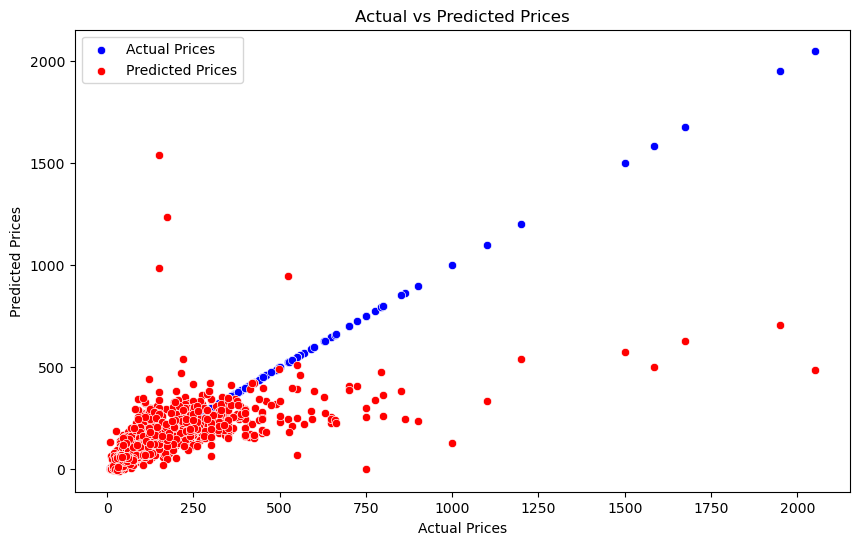

In [35]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Visualize the output
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Prices')
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()
